In [19]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

In [20]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [21]:
print(len(train_input[0]))

218


In [22]:
len(train_input[0])

218

In [23]:
len(train_input[1])

189

In [24]:
len(train_input[100])

158

In [25]:
print(train_input[0]) # 정수인코딩

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [26]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [27]:
train_target[:20]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [28]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [29]:
print(np.mean(lengths))

239.00925


In [30]:
print(np.median(lengths))

178.0


In [31]:
print(np.max(lengths))

1854


In [32]:
print(np.min(lengths))

11


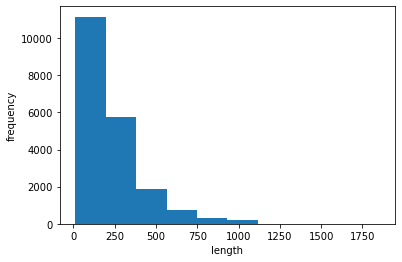

In [34]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [36]:
print(train_seq.shape)

(20000, 100)


In [37]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [38]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [39]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [40]:
val_seq = pad_sequences(val_input, maxlen=100)
val_seq

array([[ 32,   2, 225, ...,  14,  58,   2],
       [ 53,   2,   8, ...,   7,  32,   2],
       [  0,   0,   0, ...,   2,  33,  32],
       ...,
       [383,   2, 120, ...,  16,  99,  76],
       [106, 345,  12, ..., 120,   2, 156],
       [  4, 114,  21, ...,   4,   2,   2]], dtype=int32)

In [41]:
from tensorflow import keras

In [43]:
# 100개 단어 one hot encoding
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh[0])
print(len(train_oh[0]))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
100


In [44]:
train_oh.shape # '500'개의 단어사전으로 만듬

(20000, 100, 500)

In [45]:
val_oh = keras.utils.to_categorical(val_seq)

In [46]:
val_oh.shape

(5000, 100, 500)

In [48]:
model = keras.Sequential() # 모델 객체 생성
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500))) # 8개의 임의의 가중치, 100: padding한 단어수, 500: 단어사전 단어수
model.add(keras.layers.Dense(1, activation='sigmoid')) # 분류(binary)일 경우 1, activation='sigmoid'
# 다중분류일 경우, 분류 경우의 수, activation='softmax'

In [49]:
# 설정: compile
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) # 학습률 사용자 정의; optimizer객체 불러와서 조정
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
word_index = imdb.get_word_index()
word_index

1654784/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [51]:
# 훈련(fit)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True) # 3번까지 가서 가장 높은 값 사용
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')

history = model.fit(train_oh, train_target, 
                    epochs=100, 
                    batch_size=64, 
                    validation_data=(val_oh, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 30s 82ms/step - loss: 0.6973 - accuracy: 0.5081 - val_loss: 0.6931 - val_accuracy: 0.5188
Epoch 2/100
313/313 [==============================] - 24s 77ms/step - loss: 0.6927 - accuracy: 0.5194 - val_loss: 0.6918 - val_accuracy: 0.5252
Epoch 3/100
313/313 [==============================] - 31s 98ms/step - loss: 0.6912 - accuracy: 0.5280 - val_loss: 0.6907 - val_accuracy: 0.5286
Epoch 4/100
313/313 [==============================] - 33s 104ms/step - loss: 0.6898 - accuracy: 0.5343 - val_loss: 0.6899 - val_accuracy: 0.5290
Epoch 5/100
313/313 [==============================] - 30s 95ms/step - loss: 0.6885 - accuracy: 0.5425 - val_loss: 0.6891 - val_accuracy: 0.5308
Epoch 6/100
313/313 [==============================] - 24s 77ms/step - loss: 0.6871 - accuracy: 0.5462 - val_loss: 0.6885 - val_accuracy: 0.5312
Epoch 7/100
313/313 [==============================] - 25s 79ms/step - loss: 0.6856 - accuracy: 0.5535 - val_loss: 0.6880 - val_a

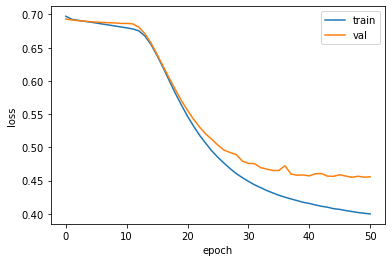

In [52]:
# train, val epoch acc, val_loss확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

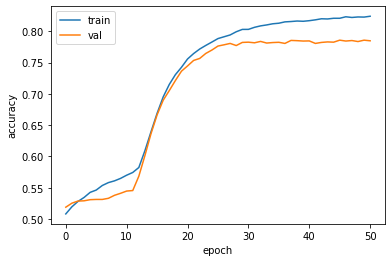

In [53]:
# train, val epoch acc, val_loss확인
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()